In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
car = pd.read_csv('/data/notebook_files/car_prediction_data.csv')

In [41]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
car.Car_Name.value_counts().reset_index()

,index,Car_Name
0,city,26
1,corolla altis,16
2,verna,14
3,fortuner,11
4,brio,10
...,...,...
93,Honda CB Trigger,1
94,Yamaha FZ S,1
95,Bajaj Pulsar 135 LS,1
96,Activa 4g,1


In [44]:
df_fuel = car.Fuel_Type.value_counts().rename_axis('Fuel').reset_index(name='count')

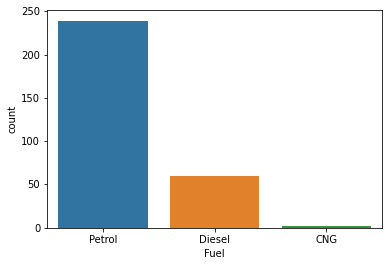

In [45]:
sns.barplot(data=df_fuel,x='Fuel',y='count')
plt.show()

In [46]:
df_seller = car.Seller_Type.value_counts().rename_axis('Seller Type').reset_index(name='count')

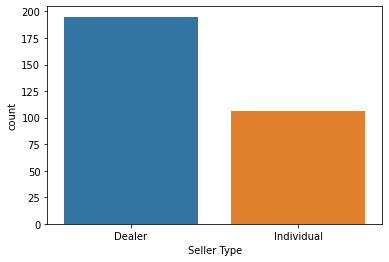

In [47]:
sns.barplot(data=df_seller,x='Seller Type',y='count')
plt.show()

In [48]:
df_Transmission = car.Transmission.value_counts().rename_axis('Transmission').reset_index(name='count')

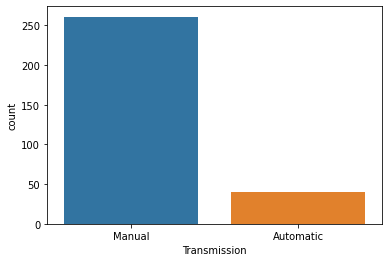

In [49]:
sns.barplot(data=df_Transmission,x='Transmission',y='count')
plt.show()

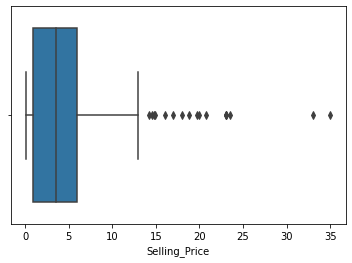

In [50]:
sns.boxplot(x=car['Selling_Price'])
plt.show()

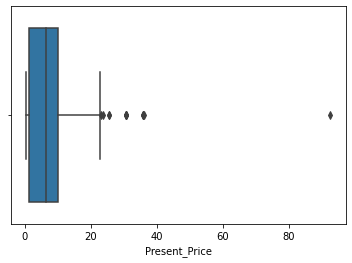

In [51]:
sns.boxplot(x=car['Present_Price'])
plt.show()

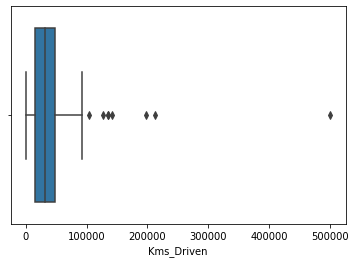

In [52]:
sns.boxplot(x=car['Kms_Driven'])
plt.show()

In [53]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [54]:
car.Fuel_Type = LabelEncoder().fit_transform(car.Fuel_Type)
car.Car_Name = LabelEncoder().fit_transform(car.Car_Name)
car.Seller_Type = LabelEncoder().fit_transform(car.Seller_Type)
car.Transmission = LabelEncoder().fit_transform(car.Transmission)

In [55]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [56]:
car.describe()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,62.571429,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,25.573535,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,82.000000,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,97.000000,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [57]:
car_corr = car.corr()
car_corr['Selling_Price']

Car_Name 0.499198
Year 0.236141
Selling_Price 1.000000
Present_Price 0.878983
Kms_Driven 0.029187
Fuel_Type -0.509467
Seller_Type -0.550724
Transmission -0.367128
Owner -0.088344
Name: Selling_Price, dtype: float64

In [58]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [59]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


In [60]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import train_test_split

In [61]:
X = car.drop(['Selling_Price', 'Car_Name'], axis=1)
y = car['Selling_Price']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
models = {'lr':LinearRegression(),'lasso':Lasso(),'ridge':Ridge(),'Decision Tree Regressor':DecisionTreeRegressor(),'Support Vector Regression':SVR(),'Random Forest Regressor':RandomForestRegressor(),'Gradient Boosting Regressor':GradientBoostingRegressor()}

In [64]:
results = []
for model in models.values():
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    cv_result = cross_val_score(model,X,y,cv=kf)
    results.append(cv_result)

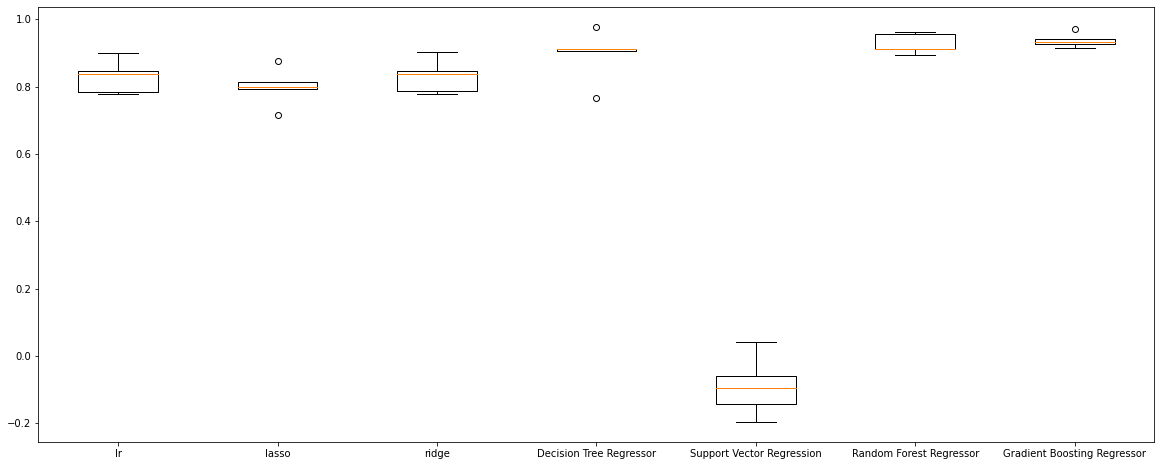

In [65]:
plt.figure(figsize=(20,8))
plt.boxplot(results, labels=models.keys())
plt.show()

In [66]:
for name, model in models.items():
    model.fit(x_train, y_train) 
    test_score = model.score(x_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

lr Test Set Accuracy: 0.8468053957655803
lasso Test Set Accuracy: 0.798551246128469
ridge Test Set Accuracy: 0.8474451929881059
Decision Tree Regressor Test Set Accuracy: 0.9454030727963618
Support Vector Regression Test Set Accuracy: -0.09528098513804473
Random Forest Regressor Test Set Accuracy: 0.9634837339646395
Gradient Boosting Regressor Test Set Accuracy: 0.9721699329913661


# **Gradient Boosting Regressor is Best Model**